In [1]:
import bluepysnap as bp
import h5py
import numpy as np
import conntility as ct
import matplotlib.pyplot as plt
%matplotlib widget

In [52]:
plt.rcParams.update({'font.size': 12})

In [19]:
for i in range(10):
    
    thalamicFile = h5py.File('original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/'+str(i)+'/vpm_input.h5')

    if i == 0:
        spikes = thalamicFile['spikes']['VPM']['timestamps'][:]
    else:
        spikes = np.hstack((spikes,thalamicFile['spikes']['VPM']['timestamps'][:]))

In [22]:
spikes = spikes[np.intersect1d(np.where(spikes<2500),np.where(spikes>2000))]

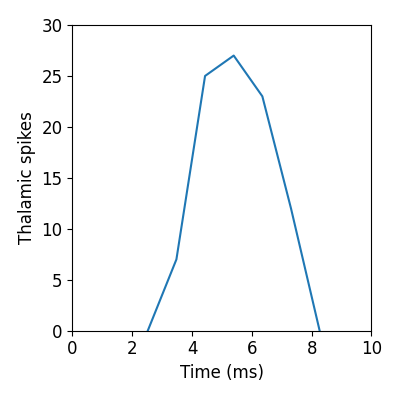

In [56]:
plt.figure(figsize=(4,4))
hist,edges = np.histogram(spikes,bins=5)
edges = (edges[1:]+edges[:-1])/2
edges = np.insert(edges,0,edges[0]-np.diff(edges)[0])
edges = np.append(edges,edges[-1]+np.diff(edges)[0])
hist = np.append(hist,0)
hist = np.insert(hist,0,0)
plt.plot(edges-2000,hist/10)
plt.xlim([0,10])
plt.ylim([0,30])
plt.xlabel('Time (ms)')
plt.ylabel('Thalamic spikes')
plt.tight_layout()
plt.savefig('figures/psth.png',dpi=600)

In [58]:
s = bp.Simulation('original/1a8bf077-4f6c-4bcb-b257-ca1f3d2388cd/0/simulation_config.json')
c = s.circuit

In [80]:
hexo1 = c.nodes.ids(group='hex_O1').get_ids()

In [78]:
hexo1.get_populations()

array(['S1nonbarrel_neurons', 'S1nonbarrel_neurons',
       'S1nonbarrel_neurons', ..., 'S1nonbarrel_neurons',
       'S1nonbarrel_neurons', 'S1nonbarrel_neurons'], dtype=object)

In [89]:
l1inh = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer1Inhibitory',properties='@target_node').values,hexo1))
l23inh = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer23Inhibitory',properties='@target_node').values,hexo1))
l4inh = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer4Inhibitory',properties='@target_node').values,hexo1))
l5inh = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer5Inhibitory',properties='@target_node').values,hexo1))
l6inh = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer6Inhibitory',properties='@target_node').values,hexo1))

l23exc = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer23Excitatory',properties='@target_node').values,hexo1))
l4exc = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer4Excitatory',properties='@target_node').values,hexo1))
l5exc = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer5Excitatory',properties='@target_node').values,hexo1))
l6exc = np.sum(np.isin(c.edges['VPM__S1nonbarrel_neurons__chemical'].pathway_edges(target='Layer6Excitatory',properties='@target_node').values,hexo1))

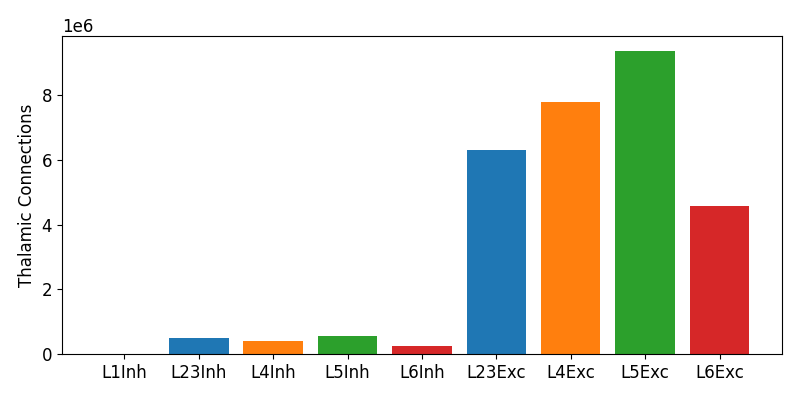

In [95]:
plt.figure(figsize=(8,4))
labels = ['L1Inh','L23Inh','L4Inh','L5Inh','L6Inh','L23Exc','L4Exc','L5Exc','L6Exc']
values = [l1inh, l23inh, l4inh,l5inh,l6inh,l23exc,l4exc,l5exc,l6exc] 

plt.bar(labels,values,color = ['C0','C0','C1','C2','C3','C0','C1','C2','C3'])

plt.ylabel('Thalamic Connections')
plt.tight_layout()
plt.savefig('figures/edges.png',dpi=600)

In [91]:
l23inh

511182